<br> Doc links for all the libraries</br>
1. [Sklearn docs](https://scikit-learn.org/stable/) 
2. [Numpy docs](https://numpy.org/doc/stable/)
3. [Scipy docs](https://scipy.org/scipylib/)
4. [Python docs](https://docs.python.org/3/tutorial/index.html)
5. [Matplot docs](https://matplotlib.org/)
6. [Pandas docs](https://pandas.pydata.org/)
7. [Seaborn docs](https://seaborn.pydata.org/)

In [154]:
# import important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
import math


# Important functions
All the important functions (utils) are included here to make the further tasks easy

In [155]:
# read the data from the path specified
def read_data(path):
    try:
        data_open = pd.read_csv(path)                       #open data using pandas
        print("data read successfully.")
        try:
            x = data_open.iloc[:, :-1]                      #splittng data between attributes and target values
            y = data_open.iloc[:, -1]
            print("x and y created sucessfully")
            return data_open, x, y
        except:
            print("check your path.")
            return -1
    except:
        print("check your path.")
        return -1

#.........................
# train test split
def split(x, y):                                            #splitting x and y into train and test set using sklearn
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

#.........................
# standard scaling
def standard_scaler(x):
    standard_scale = StandardScaler()                       #standardization of the data
    x = standard_scale.fit_transform(x)
    return x

#.........................
# polynomial features
def poly_features(x, degree):                               #adding more features for polynomial features
    poly_feat = PolynomialFeatures(degree = degree, include_bias = False)
    x = poly_feat.fit_transform(x)
    return x

#.........................
# evaluation metrics
def evaluate(y_train, y_train_pred, y_test, y_test_pred):
    print("MAE on test set: "+str(mean_absolute_error(y_test, y_test_pred)))                     #calculate mean absolute error
    print("MAE on train set: "+str(mean_absolute_error(y_train, y_train_pred)))

    print("R2 score on test set: "+str(r2_score(y_test, y_test_pred)))                           #calculate r2 score
    print("R2 score on train set: "+str(r2_score(y_train, y_train_pred)))

    print("RMSE value on test set: "+str(math.sqrt(mean_squared_error(y_test, y_test_pred))))    #calculate RMSE value
    print("RMSE value on train set: "+str(math.sqrt(mean_squared_error(y_train, y_train_pred))))
    
#.........................
# plot learning curves
def plot_learning_curves(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    train_errors = []
    test_errors = []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_pred = model.predict(x_train[:m])
        y_test_pred = model.predict(x_test[:m])
        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        test_errors.append(mean_squared_error(y_test[:m], y_test_pred))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=2, label="test")
    
#.........................
# checking values visualisation
def visual_linear(model, x_train, x_test, y_train, y_test, title):
    train_val=[]
    train_pred_val=[]
    test_val = []
    test_pred_val = []
    for i in range(60):
        train_pred_val.append(model.predict(x_train[i:i+1]))
        train_val.append(y_train[i:i+1].to_numpy())

    for i in range(60):
        test_pred_val.append(model.predict(x_test[i:i+1]))
        test_val.append(y_test[i:i+1].to_numpy()) 


    plt.figure(figsize=(10,6))
    plt.title(title)
    plt.plot((train_val), "r-+", linewidth=2, label="train_value")
    plt.plot((train_pred_val), "b-", linewidth=2, label="train_pred")
    plt.legend()
    plt.show()
    plt.figure(figsize=(10,6))
    plt.plot((test_val), "r-+", linewidth=2, label="test_value")
    plt.plot((test_pred_val), "k-", linewidth=2, label="test_pred")
    plt.legend()
    plt.show()

#...........................
# checking values visualisation for polynomial features
def visual_poly(model, x_train, x_test, y_train, y_test, title):
    train_val=[]
    train_pred_val=[]
    test_val = []
    test_pred_val = []
    for i in range(60):
        train_pred_val.append(model.predict(poly_features(x_train[i:i+1], 3)))
        train_val.append(y_train[i:i+1].to_numpy())

    for i in range(60):
        test_pred_val.append(model.predict(poly_features(x_test[i:i+1], 3)))
        test_val.append(y_test[i:i+1].to_numpy()) 


    plt.figure(figsize=(10,6))
    plt.title(title)
    plt.plot((train_val), "r-+", linewidth=2, label="train_value")
    plt.plot((train_pred_val), "b-", linewidth=2, label="train_pred")
    plt.legend()
    plt.show()
    plt.figure(figsize=(10,6))
    plt.plot((test_val), "r-+", linewidth=2, label="test_value")
    plt.plot((test_pred_val), "k-", linewidth=2, label="test_pred")
    plt.legend()
    plt.show()

In [156]:
data, x, y = read_data("data/Concrete_Data.csv")                              #reading data from the bulit function

data read successfully.
x and y created sucessfully


In [157]:
x.describe()                                                                  #describing useful properties of the data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000


In [158]:
y.describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: strength, dtype: float64

# [Corelation matrix (link)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

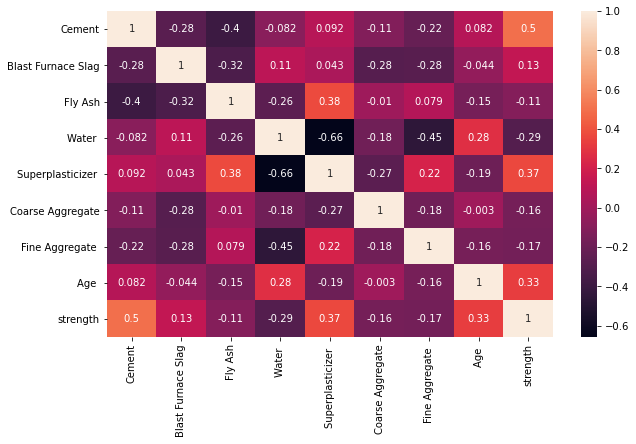

In [159]:
#correlation matrix gives relation between the attributes, it may be useful for feature selection or generation
#some values are highly positively correlated and some are highly negatively correlated

corr_matrix = data.corr()
plt.subplots(figsize=(10,6))
sn.heatmap(corr_matrix, annot=True)
plt.show()

# [Linear Regression](http://cs229.stanford.edu/summer2020/cs229-notes1.pdf)

MAE on test set: 7.745559243921436
MAE on train set: 8.330108766506687
R2 score on test set: 0.6275531792314848
R2 score on train set: 0.6105238047649741
RMSE value on test set: 9.796475901624362
RMSE value on train set: 10.518787334819802


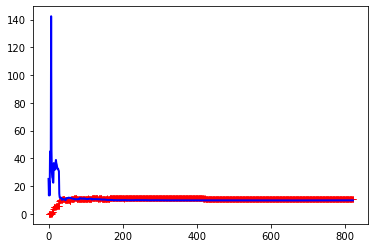

In [160]:
x_train, x_test, y_train, y_test = split(x, y)                               #splitting into training and test set
linear = LinearRegression()
linear.fit(x_train, y_train) 
y_linear_train_pred = linear.predict(x_train)                                #predicting on train and test set
y_linear_test_pred = linear.predict(x_test)
evaluate(y_train, y_linear_train_pred, y_test, y_linear_test_pred)           #evaluation of model using predefined function

linear_lc = LinearRegression()                                               #plotting learning curves
plot_learning_curves(linear_lc, x, y)

In [161]:
# linear regression with standard scaling(same steps as above cell)
linear1 = LinearRegression()
x_train_scaled = standard_scaler(x_train)
x_test_scaled = standard_scaler(x_test)
linear1.fit(x_train_scaled, y_train)
y_linear_train_pred_scaled = linear1.predict(x_train_scaled)
y_linear_test_pred_scaled = linear1.predict(x_test_scaled)
evaluate(y_train, y_linear_train_pred_scaled, y_test, y_linear_test_pred_scaled)

MAE on test set: 7.797785750775952
MAE on train set: 8.330108766506683
R2 score on test set: 0.6189650039386505
R2 score on train set: 0.6105238047649741
RMSE value on test set: 9.908779663955185
RMSE value on train set: 10.5187873348198


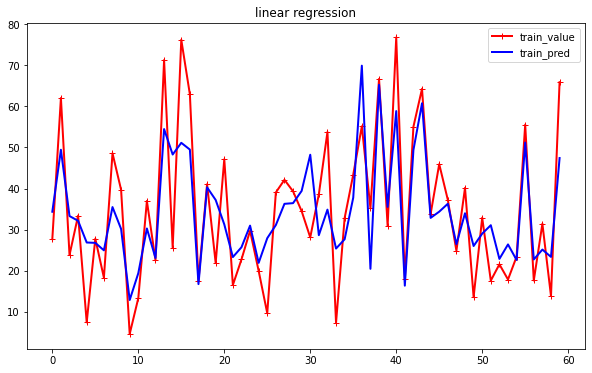

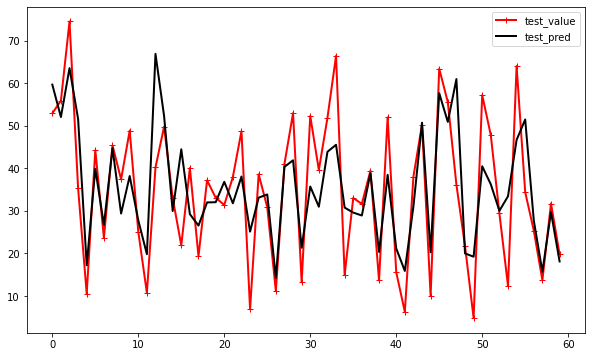

In [162]:
# checking values visualisation
# the graph plots the predicted values vs ground truth on 60 values to give us an idea about the model
visual_linear(linear, x_train, x_test, y_train, y_test, "linear regression")

# [Polynomial regression](http://cs229.stanford.edu/summer2020/cs229-notes1.pdf)

MAE on test set: 4.694398974271088
MAE on train set: 3.4127946951398376
R2 score on test set: 0.843581791647563
R2 score on train set: 0.9310620720704806
RMSE value on test set: 6.3486501045595425
RMSE value on train set: 4.42541830830294


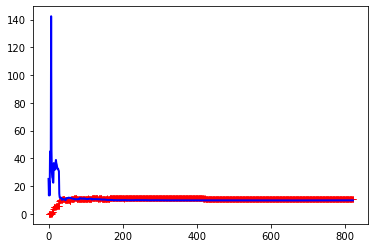

In [163]:
# polynomial regression 
x_train, x_test, y_train, y_test = split(x, y)                    #train test split
linear1 = LinearRegression()
x_train_poly = poly_features(x_train, 3)                          #generating polynomial features
x_test_poly = poly_features(x_test, 3)
linear1.fit(x_train_poly, y_train)
y_poly_train_pred = linear1.predict(x_train_poly)                 #predicting values using model
y_poly_test_pred = linear1.predict(x_test_poly)
evaluate(y_train, y_poly_train_pred, y_test, y_poly_test_pred)

poly_lc = LinearRegression()
plot_learning_curves(poly_lc, x, y)                               #plot learning curve

In [164]:
# polynomial regression with scaling
#all steps are same as above cell

x_train, x_test, y_train, y_test = split(x, y)
x_train_scaled = standard_scaler(x_train)
x_test_scaled = standard_scaler(x_test)
linear2 = LinearRegression()
x_train_poly_scaled = poly_features(x_train_scaled, 3)
x_test_poly_scaled = poly_features(x_test_scaled, 3)
linear2.fit(x_train_poly_scaled, y_train)
y_poly_train_pred_scaled = linear2.predict(x_train_poly_scaled)
y_poly_test_pred_scaled = linear2.predict(x_test_poly_scaled)
evaluate(y_train, y_poly_train_pred_scaled, y_test, y_poly_test_pred_scaled)

MAE on test set: 5.7418877184588215
MAE on train set: 3.412796568042358
R2 score on test set: 0.7369175507863599
R2 score on train set: 0.9310620721581928
RMSE value on test set: 8.233484588851503
RMSE value on train set: 4.425418305487631


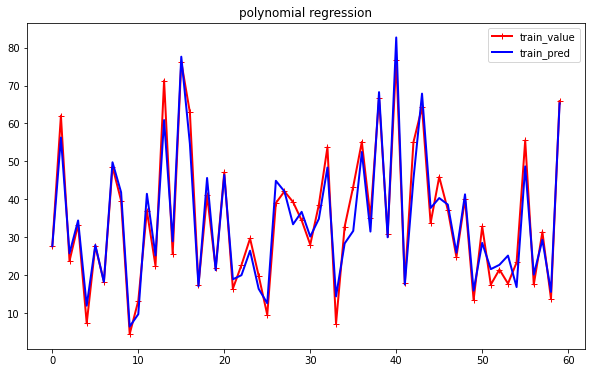

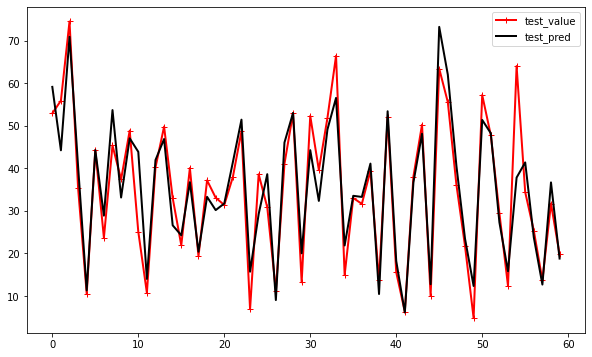

In [165]:
visual_poly(linear1, x_train, x_test, y_train, y_test, "polynomial regression")

# [Using best attributes](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)

Feature 0: 269.194721
Feature 1: 20.277314
Feature 2: 18.855983
Feature 3: 72.442418
Feature 4: 117.230611
Feature 5: 24.943060
Feature 6: 21.161958
Feature 7: 101.879058


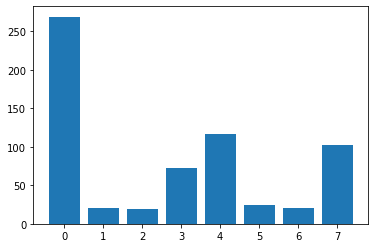

In [166]:
#feature selection

x_train, x_test, y_train, y_test = split(x, y)

def select_features(x_train, y_train, x_test):
    fs = SelectKBest(score_func=f_regression, k='all')                     #selectkbest method used
    fs.fit(x_train, y_train)
    x_train_fs = fs.transform(x_train)
    x_test_fs = fs.transform(x_test)
    return x_train_fs, x_test_fs, fs

x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)     #applying the function

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [167]:
#copy the dataset

x_copy = x.copy()
x_copy = x.drop(columns=["Blast Furnace Slag", "Fly Ash", "Coarse Aggregate"], axis=1)
x_copy.describe()

,Cement,Water,Superplasticizer,Fine Aggregate,Age
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,181.567282,6.204660,773.580485,45.662136
std,104.506364,21.354219,5.973841,80.175980,63.169912
min,102.000000,121.800000,0.000000,594.000000,1.000000
25%,192.375000,164.900000,0.000000,730.950000,7.000000
50%,272.900000,185.000000,6.400000,779.500000,28.000000
75%,350.000000,192.000000,10.200000,824.000000,56.000000
max,540.000000,247.000000,32.200000,992.600000,365.000000


# Linear Regression with Feature Selection

MAE on test set: 7.997557858169994
MAE on train set: 9.404615019328629
R2 score on test set: 0.6162439330060677
R2 score on train set: 0.5114240208602634
RMSE value on test set: 9.944097321328968
RMSE value on train set: 11.781247261326918


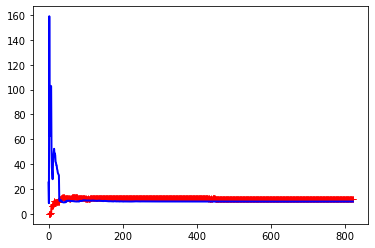

In [168]:
#steps are same as above
x_train, x_test, y_train, y_test = split(x_copy, y)
linear3 = LinearRegression()
linear3.fit(x_train, y_train)
y_linear3_train_pred = linear3.predict(x_train)
y_linear3_test_pred = linear3.predict(x_test)
evaluate(y_train, y_linear3_train_pred, y_test, y_linear3_test_pred)

linear_lc3 = LinearRegression()
plot_learning_curves(linear_lc3, x_copy, y)

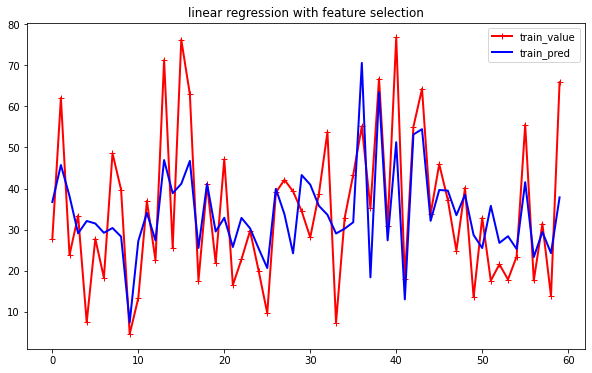

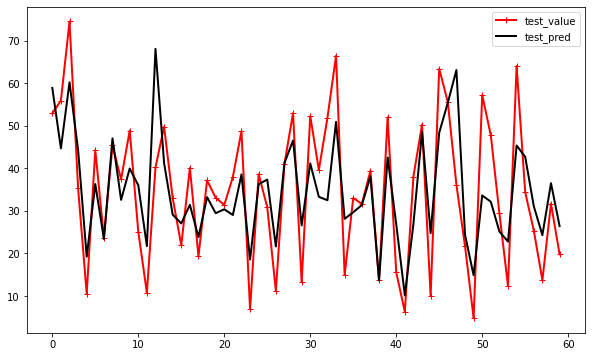

In [169]:
visual_linear(linear3, x_train, x_test, y_train, y_test, "linear regression with feature selection")

# Polynomial regression with feature selection

MAE on test set: 5.738785757491209
MAE on train set: 5.520480419593732
R2 score on test set: 0.7940342457946701
R2 score on train set: 0.8204082874120728
RMSE value on test set: 7.28509546188788
RMSE value on train set: 7.142797884985877


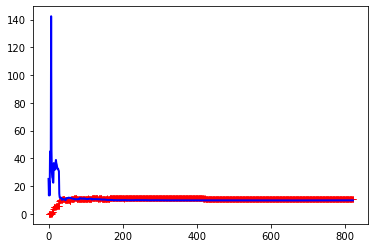

In [170]:
# polynomial regression after applying feature selection
x_train, x_test, y_train, y_test = split(x_copy, y)
linear4 = LinearRegression()
x_train_poly = poly_features(x_train, 3)
x_test_poly = poly_features(x_test, 3)
linear4.fit(x_train_poly, y_train)
y_poly_train_pred = linear4.predict(x_train_poly)
y_poly_test_pred = linear4.predict(x_test_poly)
evaluate(y_train, y_poly_train_pred, y_test, y_poly_test_pred)

poly_lc = LinearRegression()
plot_learning_curves(poly_lc, x, y)

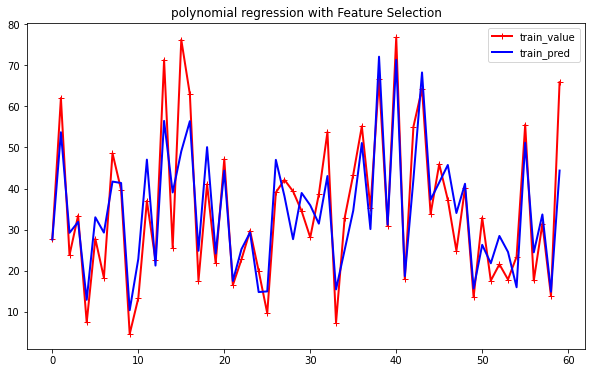

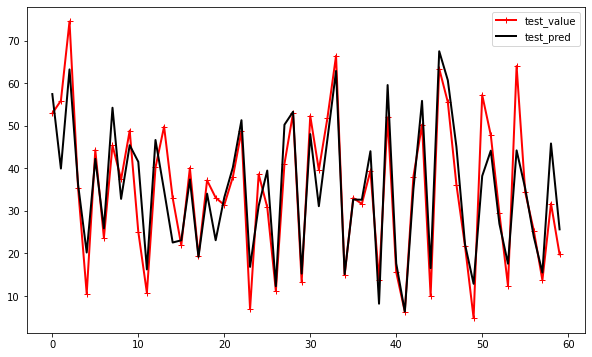

In [171]:
visual_poly(linear4, x_train, x_test, y_train, y_test, "polynomial regression with Feature Selection")

# [Support Vectors Regression](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

MAE on test set: 7.8014098925508275
MAE on train set: 8.047720702374612
R2 score on test set: 0.6098339492300537
R2 score on train set: 0.6213959446008188
RMSE value on test set: 10.026802892666446
RMSE value on train set: 10.37093342077208


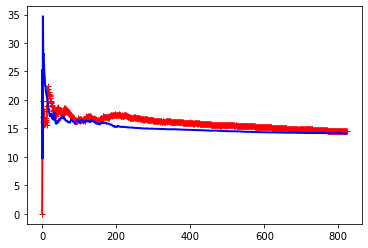

In [172]:
#import svr
from sklearn.svm import SVR

#same steps as before
x_train, x_test, y_train, y_test = split(x, y)
svc = SVR(kernel="poly", degree=3, C=5, epsilon=0.3)
svc.fit(x_train, y_train)
y_svc_train_pred = svc.predict(x_train)
y_svc_test_pred = svc.predict(x_test)
evaluate(y_train, y_svc_train_pred, y_test, y_svc_test_pred)

svc_lc = SVR(C=1.0, epsilon=0.2)
plot_learning_curves(svc_lc, x, y)

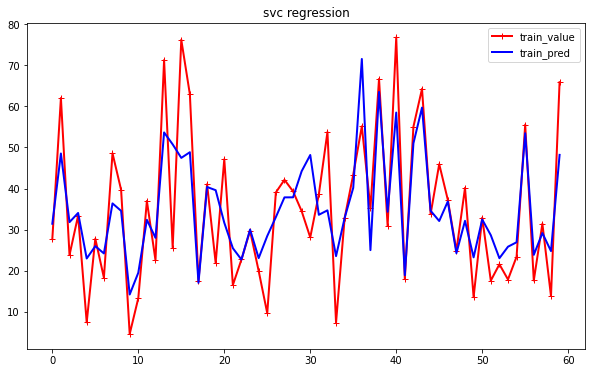

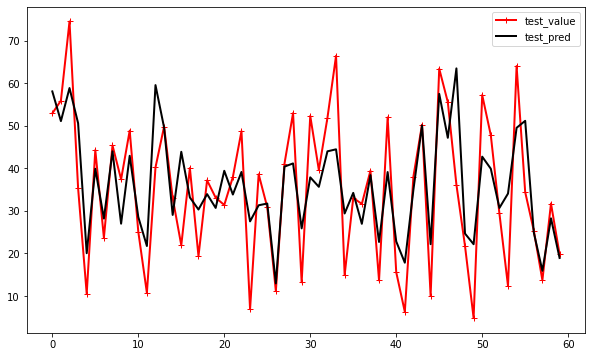

In [173]:
visual_linear(svc,x_train, x_test, y_train, y_test, "svc regression" )

In [174]:
print(svc.support_vectors_)

[[ 158.6  148.9  116.  ...  953.3  719.7   28. ]
 [ 424.    22.   132.  ...  822.   750.    28. ]
 [ 275.1    0.   121.4 ... 1053.6  777.5    3. ]
 ...
 [ 190.3    0.   125.2 ... 1079.   798.9  100. ]
 [ 475.   118.8    0.  ...  852.1  781.5   28. ]
 [ 314.     0.   113.  ...  925.   783.    28. ]]


# [Voting Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html)

MAE on test set: 7.745559243921436
MAE on train set: 8.330108766506685
R2 score on test set: 0.6275531792314848
R2 score on train set: 0.610523804764974
RMSE value on test set: 9.796475901624362
RMSE value on train set: 10.518787334819802


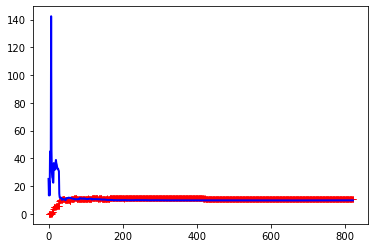

In [175]:
#training an ensemble of regression algorithms

x_train, x_test, y_train, y_test = split(x, y)
vote = VotingRegressor([('lr', linear), ('po', linear1), ('po1', linear4)])
vote.fit(x_train, y_train)

y_vote_train_pred = vote.predict(x_train)
y_vote_test_pred = vote.predict(x_test)
evaluate(y_train, y_vote_train_pred, y_test, y_vote_test_pred)

vote_lc = VotingRegressor([('lr', linear), ('po', linear1), ('po1', linear4)])
plot_learning_curves(vote_lc, x, y)

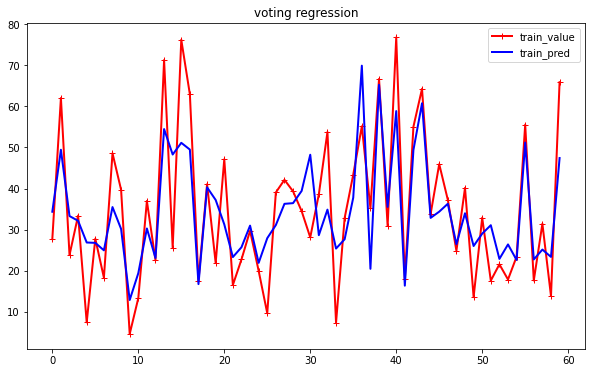

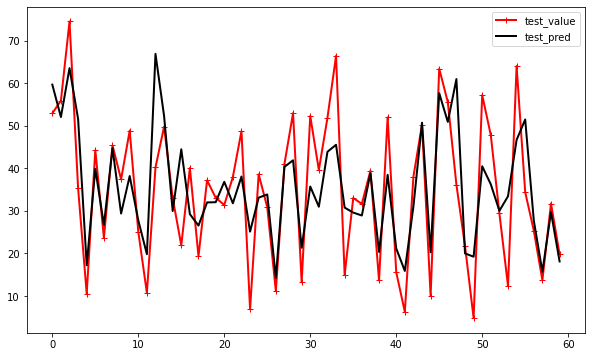

In [176]:
visual_linear(vote, x_train, x_test, y_train, y_test, "voting regression")

# [Random forest regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [177]:
#making a random forest model
rf = RandomForestRegressor(n_estimators=375, criterion='mse', random_state=42, n_jobs=-1, max_features=4, min_samples_leaf=1)
x_train, x_test, y_train, y_test = split(x, y)
rf.fit(x_train, y_train)

y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)
evaluate(y_train, y_rf_train_pred, y_test, y_rf_test_pred)

MAE on test set: 3.69700691323779
MAE on train set: 1.2796274478476481
R2 score on test set: 0.8888874563994985
R2 score on train set: 0.9866363804171704
RMSE value on test set: 5.3508069634197595
RMSE value on train set: 1.9484410354523412


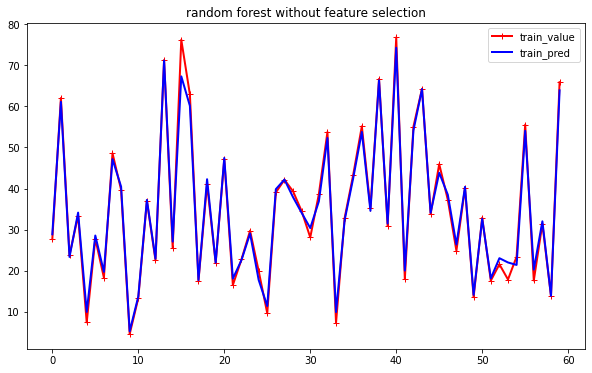

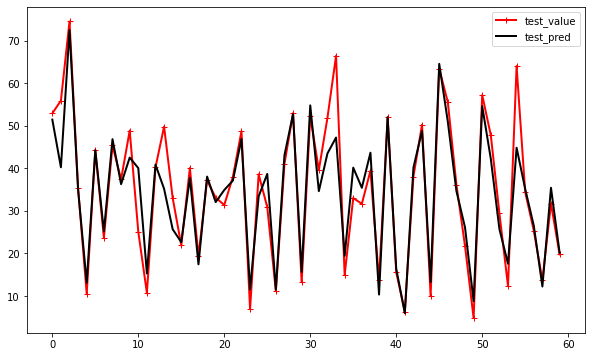

In [178]:
visual_linear(rf, x_train, x_test, y_train, y_test, "random forest without feature selection")

MAE on test set: 4.179717237963145
MAE on train set: 1.5379681214913146
R2 score on test set: 0.8603916553688953
R2 score on train set: 0.9811666265281376
RMSE value on test set: 5.99781999327598
RMSE value on train set: 2.3130726566599322


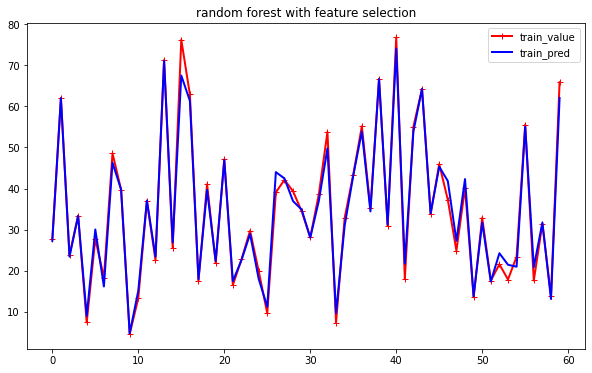

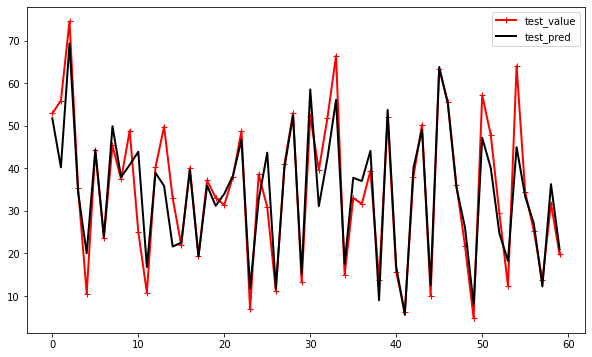

In [179]:
# random forest with feature selection
x_copy = x.copy()
x_copy = x.drop(columns=["Blast Furnace Slag", "Fly Ash", "Coarse Aggregate"], axis=1)

rf1 = RandomForestRegressor(n_estimators=175, criterion='mse', random_state=42, n_jobs=-1)
x_train, x_test, y_train, y_test = split(x_copy, y)
rf1.fit(x_train, y_train)

y_rf1_train_pred = rf1.predict(x_train)
y_rf1_test_pred = rf1.predict(x_test)
evaluate(y_train, y_rf1_train_pred, y_test, y_rf1_test_pred)

visual_linear(rf1, x_train, x_test, y_train, y_test, "random forest with feature selection")

# Experiments conducted until now conlude that random forest without feature selection is best for the dataset

# Removing outliers : (using [z score](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html))

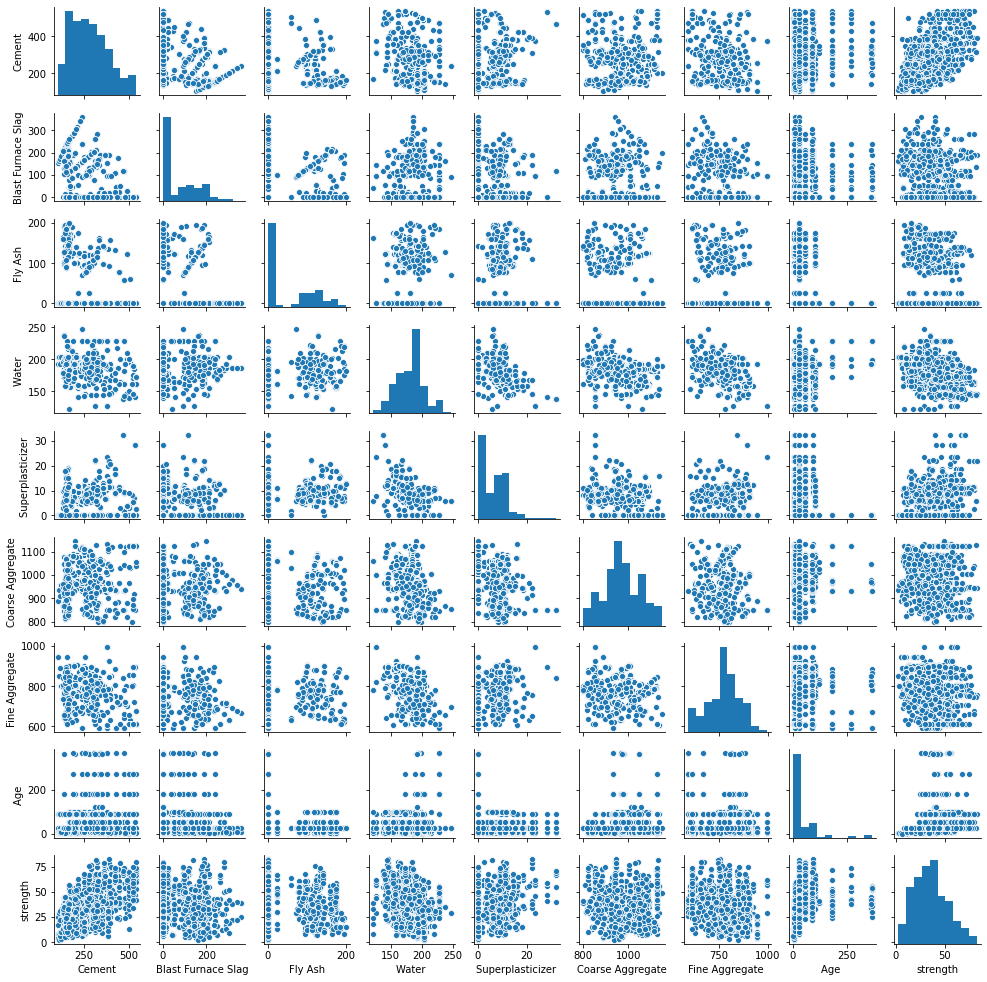

In [180]:
sn.pairplot(data, height=1.5)

In [181]:
data_copy = data.copy()
print(data_copy.shape)
z = np.abs(stats.zscore(x_copy))
threshold = 2.5                                 #defining the threshold for z score
print(np.where(z > threshold))              
print(z)

(1030, 9)
(array([   2,    3,    4,    6,   12,   17,   24,   25,   26,   30,   31,
         33,   34,   35,   41,   42,   56,   60,   61,   63,   65,   66,
         74,   74,   74,   76,   79,   90,   97,   97,   97,   99,  102,
        113,  120,  120,  120,  122,  125,  136,  143,  143,  143,  145,
        148,  159,  166,  166,  166,  168,  171,  181,  224,  225,  226,
        227,  228,  604,  610,  616,  620,  622,  756,  769,  792,  798,
        814,  820,  834,  862,  873,  908,  936,  971,  991, 1019],
      dtype=int64), array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       1, 2, 3, 2, 2, 2, 1, 2, 3, 2, 2, 2, 1, 2, 3, 2, 2, 2, 1, 2, 3, 2,
       2, 2, 1, 2, 3, 2, 2, 2, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 2, 1, 1, 1, 1, 1, 2, 1], dtype=int64))
[[2.47791487 0.91676439 0.62044832 1.21767004 0.27973311]
 [2.47791487 0.91676439 0.62044832 1.21767004 0.27973311]
 [0.49142531 2.17546125 1.03914281 2.24091709 3.55306569]
 ...
 [1.27008832 

In [182]:
data_copy = data_copy[(z < 2.5).all(axis=1)]

In [183]:
x_copy_new = data_copy.iloc[:, :-1]                      
y_copy_new = data_copy.iloc[:, -1]

In [184]:
#training without outliers on the random forest method

x_train, x_test, y_train, y_test = split(x_copy_new, y_copy_new)
rf3 = RandomForestRegressor(n_estimators=375, criterion='mse', random_state=42, n_jobs=-1, max_features=4, min_samples_leaf=1)
rf3.fit(x_train, y_train)

y_rf3_train_pred = rf3.predict(x_train)
y_rf3_test_pred = rf3.predict(x_test)
evaluate(y_train, y_rf3_train_pred, y_test, y_rf3_test_pred)

MAE on test set: 3.0563331231186766
MAE on train set: 1.344031985657339
R2 score on test set: 0.9319307286898535
R2 score on train set: 0.9841396356819239
RMSE value on test set: 4.292972112173963
RMSE value on train set: 2.090870351808026


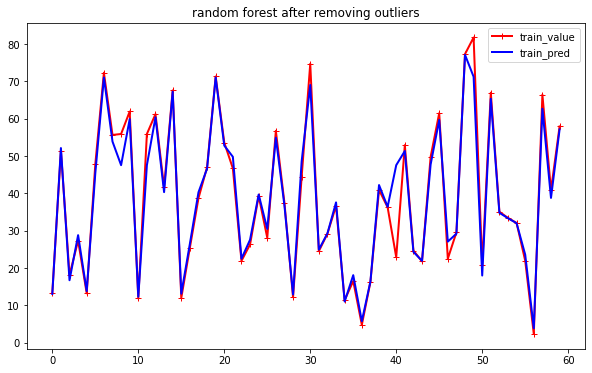

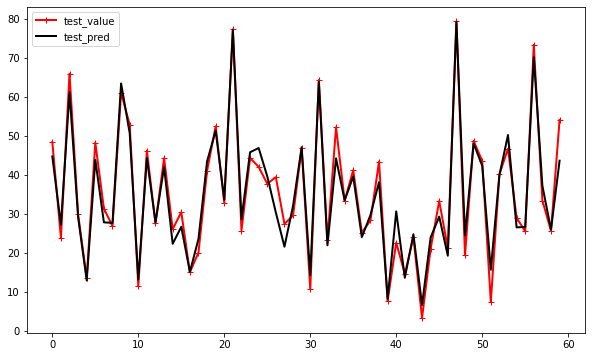

In [185]:
visual_linear(rf3, x_train, x_test, y_train, y_test, "random forest after removing outliers")